In [1]:
import os
os.chdir('D:\OneDrive\codelib\PycharmProjects\DA3\data_aux')

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import six
import sys
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import t
from scipy.stats import ttest_1samp
import statistics

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

In [4]:
missing_values = ['n/a', 'na', 'nan', 'N/A', 'NA', 'NaN', 'NAN', '--', 'Missing', 'missing', 'Unknown', 'unknown', 'UNKNOWN']

# 3. EVALUATION METRICS IN PYTHON

## Example confusion matrix dataset Iris

In [ ]:
#Step 1
iris = pd.read_csv('iris.csv', delimiter=',', decimal='.')
iris.info()

In [ ]:
#Step 2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = iris[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = iris['target']
model = LinearDiscriminantAnalysis()
model.fit(X, y)

In [ ]:
#Step 3
real= iris.target
listoflabels = sorted(real.unique().tolist())
predicted = model.predict(X)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=real,y_pred=predicted,labels = listoflabels)
conf_matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure()
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=listoflabels)
cmd.plot()
plt.show()

In [ ]:
"""
def show_confusion_table(conf_matrix, labels):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    ax.set_xticks(range(0,len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticks(range(0,len(labels)))
    ax.set_yticklabels(labels)
    plt.show()

show_confusion_table(conf_matrix, listoflabels) """

In [ ]:
#Step 4
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
accuracy_score (y_true=real,y_pred=predicted)

In [ ]:
print(real.unique())
precision_recall_fscore_support (y_true=real,y_pred=predicted,labels = real.unique(), beta=1.0)

## Example ROC-curve dataset biopsy

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score 

def plot_roc(y_true, y_score, title='ROC Curve', **kwargs):
    if 'pos_label' in kwargs:
        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score, pos_label=kwargs.get('pos_label'))
        auc = 1-roc_auc_score(y_true, y_score,max_fpr=1.0)
    else:
        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score)
        auc = 1-roc_auc_score(y_true, y_score, max_fpr=1.0)

    # calculate optimal cut-off with Youden index method
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    figsize = kwargs.get('figsize', (7, 7))
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.grid(linestyle='--')

    # plot ROC curve
    ax.plot(fpr, tpr, color='darkorange', label='AUC: {}'.format(auc))
    ax.set_title(title)
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.fill_between(fpr, tpr, alpha=0.3, color='darkorange', edgecolor='black')

    # plot classifier
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # plot optimal cut-off
    ax.scatter(fpr[optimal_idx], tpr[optimal_idx], label='optimal cutoff {:.2f} on ({:.2f},{:.2f})'.format(optimal_threshold, fpr[optimal_idx], tpr[optimal_idx]), color='red')
    ax.plot([fpr[optimal_idx], fpr[optimal_idx]], [0, tpr[optimal_idx]], linestyle='--', color='red')
    ax.plot([0, fpr[optimal_idx]], [tpr[optimal_idx], tpr[optimal_idx]], linestyle='--', color='red')

    ax.legend(loc='lower right')
    plt.show()

In [ ]:
#Step 1: Read the data
biopsy = pd.read_csv('biopsy.csv', delimiter=';')

Model based on V1

In [ ]:
#Step 2: Make a model
#X = biopsy[['V1']]
X = biopsy[['V1']]
y = biopsy['class']
listoflabels = sorted(y.unique().tolist())
model = LinearDiscriminantAnalysis()
model.fit(X,y)

Model based on V1 and V2

In [ ]:
#Step 2: Make a model
#X = biopsy[['V1']]
X = biopsy[['V1','V2']]
y = biopsy['class']
listoflabels = sorted(y.unique().tolist())
model = LinearDiscriminantAnalysis()
model.fit(X,y)

In [ ]:
# Step 3: confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predicted = model.predict(X)
conf_matrix = confusion_matrix(y_true=y,y_pred=predicted)
plt.figure()
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=listoflabels)
cmd.plot()
plt.show()

In [ ]:
# Step 4: calculate metrics
accuracy_score (y_true=y,y_pred=predicted)

In [ ]:
precision_recall_fscore_support (y_true=y,y_pred=predicted, beta=1.0)

In [ ]:
#Step 5: Plot ROC curve with home made function
y_true = y
y_score = model.predict_proba(X)[:,0]
plot_roc(y_true, y_score, pos_label='benign')

# 6. QUESTIONNAIRE

Load data:

In [7]:
studenq = pd.read_csv('Questionnaire 21-22.csv', delimiter=';', decimal='.')
studenq.info()
studenq.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   First Letter         39 non-null     object 
 1   Number Languages     39 non-null     float64
 2   Writing Hand         39 non-null     object 
 3   Shoe Size            39 non-null     float64
 4   Length               39 non-null     int64  
 5   Blood Type           39 non-null     object 
 6   Resus Factor         39 non-null     object 
 7   Siblings             39 non-null     int64  
 8   Internet Purchase    39 non-null     object 
 9   Mobile Devices       39 non-null     int64  
 10  Leisure              39 non-null     object 
 11  Hours Math           39 non-null     object 
 12  Importance AI Study  39 non-null     object 
 13  Antwerp Address      39 non-null     object 
 14  Travel Distance      39 non-null     float64
 15  Travel Time          39 non-null     int64

,Number Languages,Shoe Size,Length,Siblings,Mobile Devices,Travel Distance,Travel Time,Biden
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,3.006410,42.423077,177.358974,1.846154,2.692308,10.815897,31.205128,4.358974
std,0.987566,2.896319,9.560024,1.203907,1.379432,14.377038,27.939954,1.662072
min,1.250000,36.500000,158.000000,0.000000,1.000000,0.100000,0.000000,2.000000
25%,2.000000,41.000000,170.000000,1.000000,2.000000,1.700000,10.000000,3.500000
50%,3.000000,43.000000,178.000000,2.000000,2.000000,2.600000,19.000000,4.000000
75%,4.000000,44.250000,185.000000,2.000000,3.000000,16.000000,45.500000,4.000000
max,6.000000,48.000000,195.000000,6.000000,7.000000,48.000000,90.000000,8.000000


## Question 1

1\. We want to predict whether students are very motivated to obtain a degree in Applied Computer Science.

1.a. A The independent data (the forecasters) are "whether or not to do shopping over the internet", "the number of devices used", "the number of hours of mathematics" 

Put the independent data in a new dataframe with name df and make sure the values of the forecasters are numeric and that unrealistic data is changes into nan-values.

In [8]:
df = pd.DataFrame()
df['Mobile Devices'] = studenq['Mobile Devices'].copy()
df['Hours Math'] = studenq['Hours Math'].copy()
df['Internet Purchase'] = studenq['Internet Purchase'].copy()
#OR
#df = studenq.loc[:,['Mobile Devices','Hours Math','Internet Purchase']].copy()

In [9]:
df['Hours Math'] = pd.to_numeric(df['Hours Math'], errors = 'coerce')
df.loc[df['Hours Math'] > 15, 'Hours Math'] = np.nan

In [10]:
df.loc[df['Internet Purchase'] == 'No', 'Internet Purchase'] = 0
df.loc[df['Internet Purchase'] == 'Yes', 'Internet Purchase'] = 1
df['Internet Purchase'] = pd.to_numeric(df['Internet Purchase'])

In [11]:
df.describe()

,Mobile Devices,Hours Math,Internet Purchase
count,39.000000,18.000000,39.000000
mean,2.692308,4.666667,0.794872
std,1.379432,2.589572,0.409074
min,1.000000,0.000000,0.000000
25%,2.000000,3.250000,1.000000
50%,2.000000,5.500000,1.000000
75%,3.000000,6.000000,1.000000
max,7.000000,8.000000,1.000000


1.b. In the questionnaire you want to predict the "importance of AI study". This is an ordinal fact that you will have to reduce to two possible values: anything equal or more than "Great importance" is "large", everything smaller is "moderate". Put this as a column in the dataframe df

In [12]:
df['Importance AI Study'] = studenq['Importance AI Study'].copy()
df['Importance AI Study'].unique()
df['Importance AI Study'] = df['Importance AI Study'].replace(to_replace=['Not at all', 'Little importance', 'Moderate importance'], value=['moderate', 'moderate', 'moderate'])
df['Importance AI Study'] = df['Importance AI Study'].replace(to_replace=['Great importance', 'Very great importance', 'Extreemly important'], value=['large', 'large', 'large'])
df['Importance AI Study'] = df['Importance AI Study'].astype(pd.CategoricalDtype( categories=["moderate", "large"], ordered=True))

In [ ]:
#OR
#studenq['Importance AI Study'] = studenq['Importance AI Study'].astype(pd.CategoricalDtype(categories=['Not at all', 'Little importance', 'Moderate importance', 'Great importance', 'Very great importance', 'Extreemly important'], ordered=True))
#importance = pd.Series(index=range(len(studenq)),dtype='category').astype(pd.CategoricalDtype( categories=["moderate", "large"], ordered=True))
#for i in range(0,len(studenq)):
#    if studenq.loc[i,'Importance AI Study'] < 'Great importance':
#        importance[i] = 'moderate'
#    else:
#        importance[i] = 'large'
#df['Importance AI Study'] = importance

1.c. Use linear discriminant analysis as model to predict the dependent variable “importance of AI study” my means of the independent variables (forecasters). 
Make the predictions for the available data.

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
df=df.dropna(axis='rows')
X = df.loc[:,['Mobile Devices','Hours Math','Internet Purchase']].copy()
y = df['Importance AI Study'].copy()
model.fit(X, y)
predicted = model.predict(X)

1.d. Look at the results of the evaluation mertrics:
- Make the confusion matrix
- Calculate the Accuracy, Precision, Recall and F1-Measure
- Make a ROC curve

<Figure size 640x480 with 0 Axes>

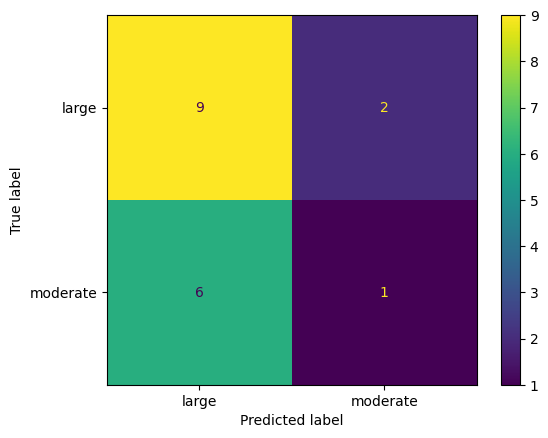

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_recall_fscore_support, roc_curve, roc_auc_score
conf_matrix = confusion_matrix(y_true=y,y_pred=predicted)
listoflabels = sorted(y.unique().tolist())
plt.figure()
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=listoflabels)
cmd.plot()
plt.show()

In [15]:
accuracy_score (y_true=y,y_pred=predicted)

0.5555555555555556

In [16]:
precision_recall_fscore_support (y_true=y,y_pred=predicted, beta=1.0)

(array([0.6       , 0.33333333]),
 array([0.81818182, 0.14285714]),
 array([0.69230769, 0.2       ]),
 array([11,  7], dtype=int64))

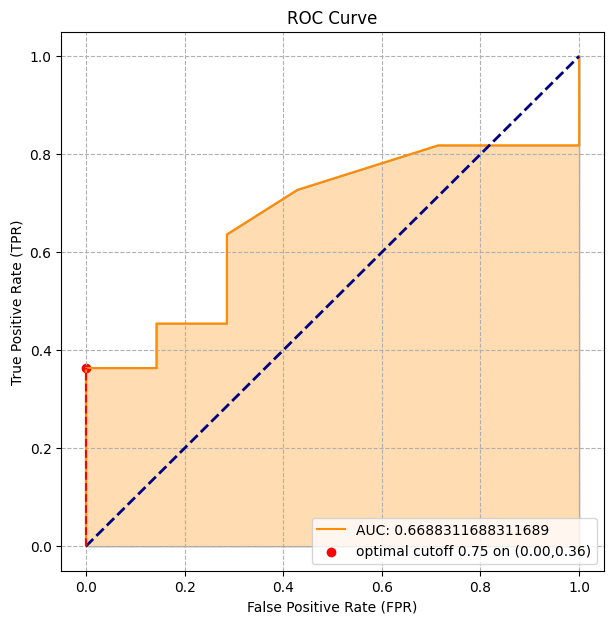

In [17]:
y_score = model.predict_proba(X)[:,0]
plot_roc(y, y_score, pos_label='large') #home made functio,

In [18]:
fpr, tpr, thresholds = roc_curve(y_true=y, y_score=y_score, pos_label='large')
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.         0.14285714 0.14285714
 0.28571429 0.28571429 0.42857143 0.71428571 1.         1.        ]
[0.         0.09090909 0.27272727 0.36363636 0.36363636 0.45454545
 0.45454545 0.63636364 0.72727273 0.81818182 0.81818182 1.        ]
[       inf 0.83175932 0.75759607 0.74844299 0.69449851 0.67068836
 0.62314666 0.58967757 0.58661633 0.5702951  0.48044748 0.38316476]


In [19]:
auc = roc_auc_score(y, y_score)
print(auc)

0.3311688311688311


In [ ]:
print(y_score)